# Regressão Logística Multinomial para Classificação de Peso em Meninas de 15 Anos
Este notebook implementa um modelo de regressão logística multinomial para classificar meninas de 15 anos nas categorias: obesidade, sobrepeso, peso normal e anorexia.

In [1]:
# Importar bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo dos gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
# Gerar dados sintéticos para meninas de 15 anos
np.random.seed(42)
n_samples = 1000

# Definir parâmetros para cada categoria baseados em dados médicos
# IMC categorias: Anorexia (<16), Normal (18.5-24.9), Sobrepeso (25-29.9), Obesidade (>=30)

# Anorexia: altura normal, peso muito baixo
altura_anorexia = np.random.normal(160, 8, 100)  # cm
peso_anorexia = np.random.normal(40, 3, 100)     # kg

# Peso normal
altura_normal = np.random.normal(162, 7, 400)    # cm
peso_normal = np.random.normal(55, 5, 400)       # kg

# Sobrepeso
altura_sobrepeso = np.random.normal(161, 6, 300) # cm
peso_sobrepeso = np.random.normal(70, 6, 300)    # kg

# Obesidade
altura_obesidade = np.random.normal(159, 7, 200) # cm
peso_obesidade = np.random.normal(85, 8, 200)    # kg

# Combinar os dados
altura = np.concatenate([altura_anorexia, altura_normal, altura_sobrepeso, altura_obesidade])
peso = np.concatenate([peso_anorexia, peso_normal, peso_sobrepeso, peso_obesidade])

# Calcular IMC
imc = peso / ((altura/100) ** 2)

# Definir categorias
categorias = ['Anorexia'] * 100 + ['Normal'] * 400 + ['Sobrepeso'] * 300 + ['Obesidade'] * 200

# Criar DataFrame
df = pd.DataFrame({
    'altura_cm': altura,
    'peso_kg': peso,
    'imc': imc,
    'categoria': categorias
})

print("Dataset gerado com sucesso!")
print(f"Tamanho do dataset: {len(df)} amostras")
print("\nDistribuição das categorias:")
print(df['categoria'].value_counts())

Dataset gerado com sucesso!
Tamanho do dataset: 1000 amostras

Distribuição das categorias:
Normal       400
Sobrepeso    300
Obesidade    200
Anorexia     100
Name: categoria, dtype: int64


In [3]:
# Explorar os dados
print("Estatísticas descritivas:")
print(df.describe())
print("\nPrimeiras 10 linhas:")
print(df.head(10))

Estatísticas descritivas:
         altura_cm      peso_kg          imc
count  1000.000000  1000.000000  1000.000000
mean    161.164306    64.252098    24.882448
std       6.758732    14.922109     6.257333
min     139.042039    34.243686    12.460481
25%     156.678850    53.650763    20.101223
50%     161.231121    62.739679    24.182742
75%     165.827208    74.614903    29.052425
max     188.969120   110.101988    43.962998

Primeiras 10 linhas:
    altura_cm    peso_kg        imc categoria
0  163.973713  35.753888  13.297647  Anorexia
1  158.893886  38.738064  15.343468  Anorexia
2  165.181508  38.971856  14.283290  Anorexia
3  172.184239  37.593168  12.680084  Anorexia
4  158.126773  39.516143  15.803880  Anorexia
5  158.126904  41.212153  16.482146  Anorexia
6  172.633703  45.658558  15.320432  Anorexia
7  166.139478  40.523733  14.681275  Anorexia
8  156.244205  40.772651  16.701717  Anorexia
9  164.340480  39.776662  14.727846  Anorexia


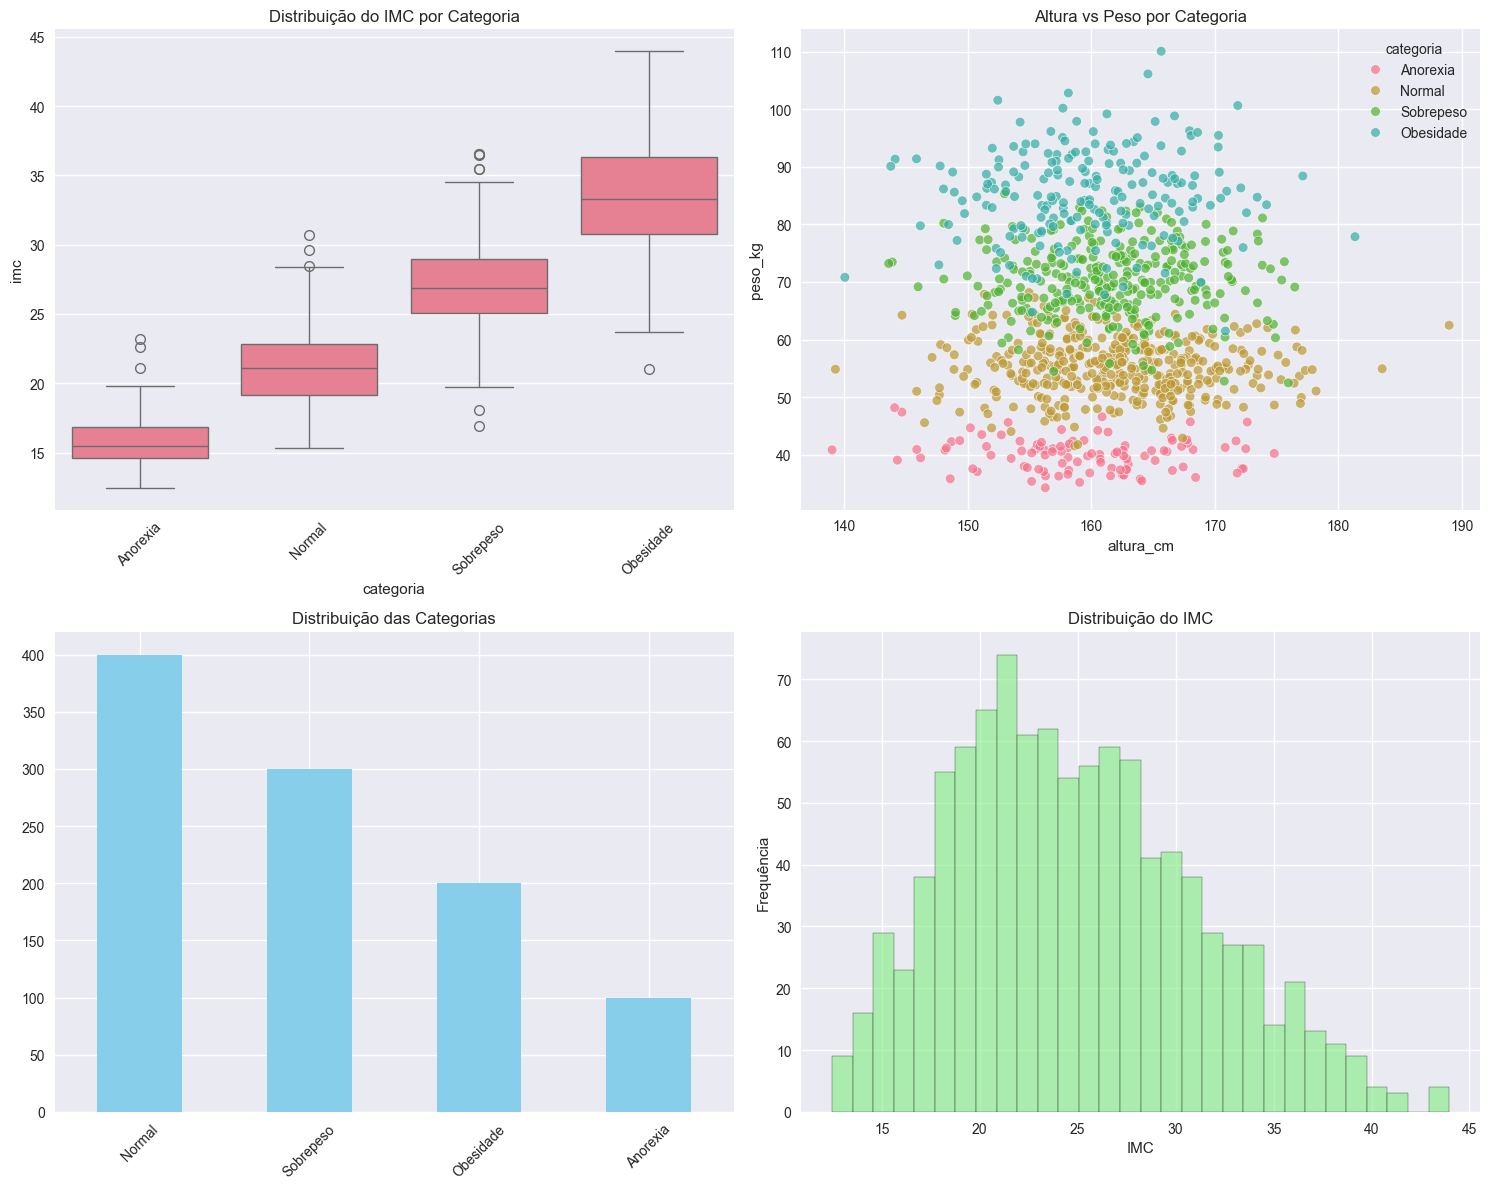

In [4]:
# Visualização dos dados
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Distribuição do IMC por categoria
sns.boxplot(data=df, x='categoria', y='imc', ax=axes[0,0])
axes[0,0].set_title('Distribuição do IMC por Categoria')
axes[0,0].tick_params(axis='x', rotation=45)

# Scatter plot Altura vs Peso
sns.scatterplot(data=df, x='altura_cm', y='peso_kg', hue='categoria', ax=axes[0,1], alpha=0.7)
axes[0,1].set_title('Altura vs Peso por Categoria')

# Distribuição das categorias
df['categoria'].value_counts().plot(kind='bar', ax=axes[1,0], color='skyblue')
axes[1,0].set_title('Distribuição das Categorias')
axes[1,0].tick_params(axis='x', rotation=45)

# Histograma do IMC
axes[1,1].hist(df['imc'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1,1].set_title('Distribuição do IMC')
axes[1,1].set_xlabel('IMC')
axes[1,1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

In [5]:
# Preparar dados para o modelo
# Features: altura, peso e IMC
X = df[['altura_cm', 'peso_kg', 'imc']].values
y = df['categoria'].values

# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Padronizar as features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")
print(f"Número de features: {X_train.shape[1]}")

Tamanho do conjunto de treino: 800 amostras
Tamanho do conjunto de teste: 200 amostras
Número de features: 3


In [6]:
# Treinar modelo de Regressão Logística Multinomial
log_reg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    random_state=42,
    max_iter=1000
)

log_reg.fit(X_train_scaled, y_train)

print("Modelo treinado com sucesso!")
print(f"Classes identificadas: {log_reg.classes_}")
print(f"Número de iterações: {log_reg.n_iter_}")

Modelo treinado com sucesso!
Classes identificadas: ['Anorexia' 'Normal' 'Obesidade' 'Sobrepeso']
Número de iterações: [31]


In [7]:
# Fazer predições
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.3f}")

print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo: 0.860

Relatório de classificação:
              precision    recall  f1-score   support

    Anorexia       0.95      1.00      0.98        20
      Normal       0.92      0.90      0.91        80
   Obesidade       0.81      0.85      0.83        40
   Sobrepeso       0.78      0.77      0.77        60

    accuracy                           0.86       200
   macro avg       0.87      0.88      0.87       200
weighted avg       0.86      0.86      0.86       200



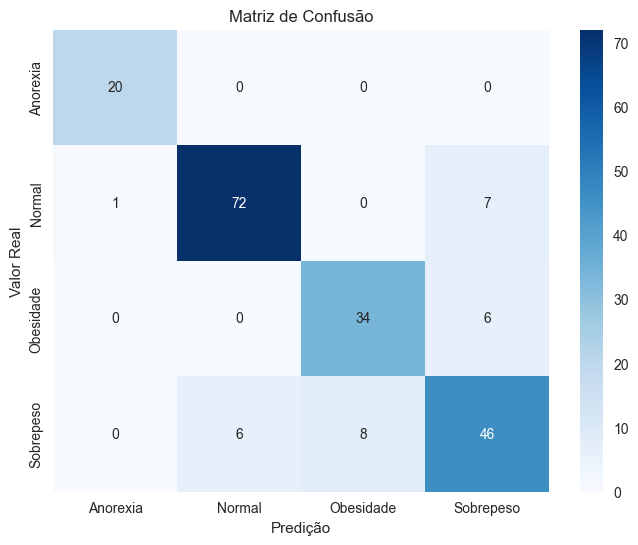

In [8]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=log_reg.classes_, 
            yticklabels=log_reg.classes_)
plt.title('Matriz de Confusão')
plt.xlabel('Predição')
plt.ylabel('Valor Real')
plt.show()

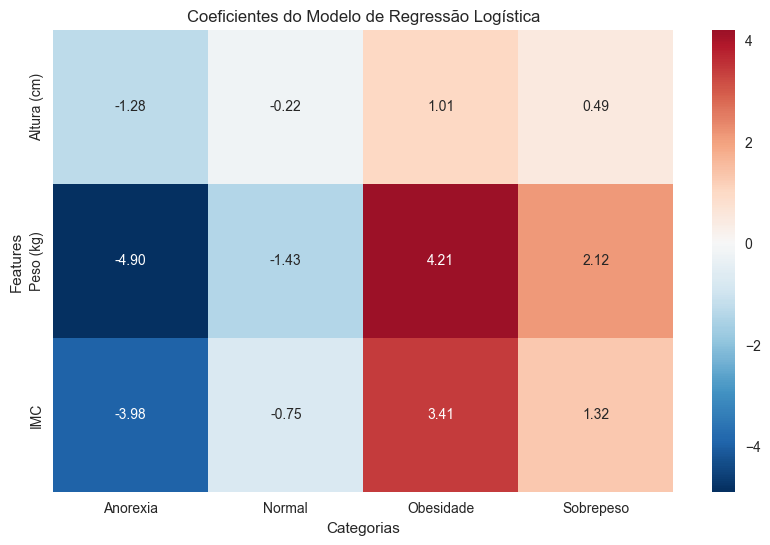

Coeficientes do modelo:
             Anorexia    Normal  Obesidade  Sobrepeso
Altura (cm) -1.283780 -0.222380   1.014530   0.491630
Peso (kg)   -4.901543 -1.427185   4.208395   2.120333
IMC         -3.975420 -0.754333   3.408294   1.321459


In [9]:
# Visualizar coeficientes do modelo
feature_names = ['Altura (cm)', 'Peso (kg)', 'IMC']
coef_df = pd.DataFrame(
    log_reg.coef_.T, 
    index=feature_names, 
    columns=log_reg.classes_
)

plt.figure(figsize=(10, 6))
sns.heatmap(coef_df, annot=True, cmap='RdBu_r', center=0, fmt='.2f')
plt.title('Coeficientes do Modelo de Regressão Logística')
plt.xlabel('Categorias')
plt.ylabel('Features')
plt.show()

print("Coeficientes do modelo:")
print(coef_df)

In [10]:
# Função para classificar uma nova menina de 15 anos
def classificar_menina(altura_cm, peso_kg, modelo=log_reg, scaler=scaler):
    """
    Classifica uma menina de 15 anos baseada na altura e peso.
    
    Args:
        altura_cm: altura em centímetros
        peso_kg: peso em quilogramas
        modelo: modelo treinado
        scaler: scaler ajustado
    
    Returns:
        categoria prevista e probabilidades
    """
    imc = peso_kg / ((altura_cm/100) ** 2)
    
    # Preparar entrada
    entrada = np.array([[altura_cm, peso_kg, imc]])
    entrada_scaled = scaler.transform(entrada)
    
    # Predição
    categoria = modelo.predict(entrada_scaled)[0]
    probabilidades = modelo.predict_proba(entrada_scaled)[0]
    
    print(f"Menina de 15 anos:")
    print(f"Altura: {altura_cm} cm")
    print(f"Peso: {peso_kg} kg")
    print(f"IMC: {imc:.2f}")
    print(f"\nCategoria prevista: {categoria}")
    print(f"\nProbabilidades:")
    for classe, prob in zip(modelo.classes_, probabilidades):
        print(f"  {classe}: {prob:.3f} ({prob*100:.1f}%)")
    
    return categoria, probabilidades

# Exemplos de classificação
print("Exemplo 1: Menina com possível anorexia")
classificar_menina(165, 42)

print("\n" + "="*50 + "\n")

print("Exemplo 2: Menina com peso normal")
classificar_menina(160, 55)

print("\n" + "="*50 + "\n")

print("Exemplo 3: Menina com sobrepeso")
classificar_menina(158, 68)

print("\n" + "="*50 + "\n")

print("Exemplo 4: Menina com obesidade")
classificar_menina(155, 80)

Exemplo 1: Menina com possível anorexia
Menina de 15 anos:
Altura: 165 cm
Peso: 42 kg
IMC: 15.43

Categoria prevista: Anorexia

Probabilidades:
  Anorexia: 0.712 (71.2%)
  Normal: 0.288 (28.8%)
  Obesidade: 0.000 (0.0%)
  Sobrepeso: 0.000 (0.0%)


Exemplo 2: Menina com peso normal
Menina de 15 anos:
Altura: 160 cm
Peso: 55 kg
IMC: 21.48

Categoria prevista: Normal

Probabilidades:
  Anorexia: 0.011 (1.1%)
  Normal: 0.942 (94.2%)
  Obesidade: 0.000 (0.0%)
  Sobrepeso: 0.047 (4.7%)


Exemplo 3: Menina com sobrepeso
Menina de 15 anos:
Altura: 158 cm
Peso: 68 kg
IMC: 27.24

Categoria prevista: Sobrepeso

Probabilidades:
  Anorexia: 0.000 (0.0%)
  Normal: 0.135 (13.5%)
  Obesidade: 0.052 (5.2%)
  Sobrepeso: 0.814 (81.4%)


Exemplo 4: Menina com obesidade
Menina de 15 anos:
Altura: 155 cm
Peso: 80 kg
IMC: 33.30

Categoria prevista: Obesidade

Probabilidades:
  Anorexia: 0.000 (0.0%)
  Normal: 0.001 (0.1%)
  Obesidade: 0.671 (67.1%)
  Sobrepeso: 0.329 (32.9%)


('Obesidade',
 array([9.68952491e-11, 5.71017949e-04, 6.70843853e-01, 3.28585129e-01]))

## Resumo dos Resultados

### Modelo Implementado
- **Algoritmo**: Regressão Logística Multinomial
- **Features**: Altura, Peso e IMC
- **Classes**: Anorexia, Normal, Sobrepeso, Obesidade

### Características do Modelo
1. **Classificação Multiclasse**: Utiliza a abordagem "one-vs-rest" para classificar em 4 categorias
2. **Probabilidades**: Fornece probabilidades para cada categoria
3. **Interpretabilidade**: Os coeficientes mostram a importância de cada feature

### Aplicações
- Triagem inicial em consultas médicas
- Monitoramento de saúde em escolas
- Suporte a profissionais de saúde

### Limitações
- Baseado apenas em medidas antropométricas
- Não considera fatores genéticos ou metabólicos
- Requer validação com dados reais

**Nota**: Este modelo é apenas para fins educacionais. Decisões médicas reais devem sempre envolver profissionais qualificados.